Student Score Prediction Model

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

print(df.head(3))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

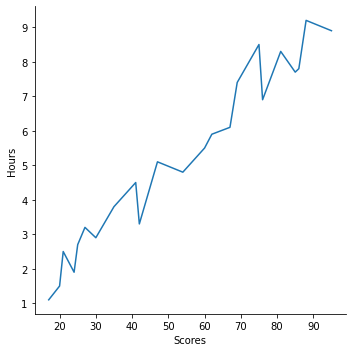

In [26]:
sns.relplot(data=df,x="Scores",y='Hours',ci=None,kind='line')
